In [43]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv("dataset/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
df['species']=le.fit_transform(df['species'])

In [47]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
77,6.7,3.0,5.0,1.7,1
106,4.9,2.5,4.5,1.7,2
138,6.0,3.0,4.8,1.8,2
149,5.9,3.0,5.1,1.8,2
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1
89,5.5,2.5,4.0,1.3,1
74,6.4,2.9,4.3,1.3,1
62,6.0,2.2,4.0,1.0,1
63,6.1,2.9,4.7,1.4,1


In [48]:
x=df.iloc[:,0:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='random')

In [53]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [54]:
pred=dtc.predict(x_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 2, 0, 1, 1, 1, 0])

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy of tree confusion tree',accuracy_score(y_test,pred))

accuracy of tree confusion tree 0.9333333333333333


In [56]:
print('decision tree confusion matrix')
pd.DataFrame(confusion_matrix(y_test,pred),columns=list(range(0,3)))

decision tree confusion matrix


,0,1,2
0,9,2,0
1,0,13,0
2,0,0,6


In [57]:
result=pd.DataFrame()
result['actual label']=y_test
result['decision tree prediction']=pred

In [58]:
result

,actual label,decision tree prediction
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


<AxesSubplot:ylabel='Density'>

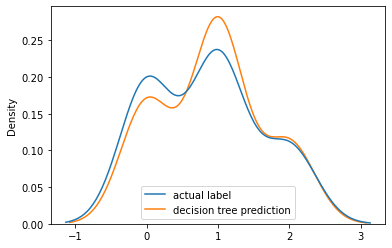

In [60]:
import seaborn as sns
sns.kdeplot(data=result)
